# Task 1: Prediction using Supervised ML




- Predict the percentage of an student based on the no. of study hours.


#### By - Venkat Vinay Randhi

## Import Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Import Data

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

data = pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Analyse Data

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [69]:
#Count null values in the data

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no missing records in the data.

In [71]:
#Duplicate records

data.duplicated().sum()

0

There are no duplicated records in the data.

### Univariate Analysis

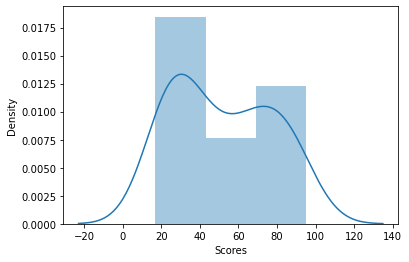

In [78]:
sns.distplot(data.Scores)

plt.show()

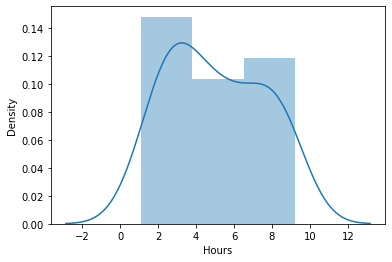

In [79]:
sns.distplot(data.Hours)

plt.show()

We can observe that both of the distributions are bimodal.

### Bivariate Analysis

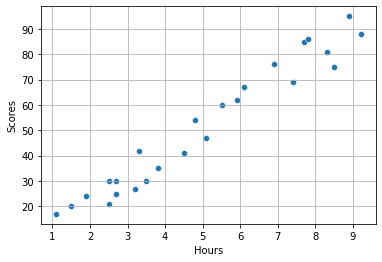

In [7]:
sns.scatterplot(data.Hours,data.Scores)

plt.grid()
plt.show()

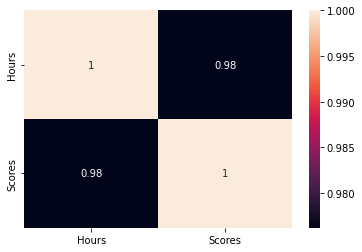

In [8]:
sns.heatmap(data.corr(),annot=True)

plt.show()

We can observe that, there is a positive correlation between scores and hours i.e., as the number of hours increases, the values of scores are also increasing.

# Model Building

In [80]:
#Import required libraries.

from sklearn.model_selection import train_test_split  #To split the data

from sklearn.linear_model import LinearRegression     #To build the model

regressor = LinearRegression()

from sklearn import metrics   #For model evaluation

In [81]:
#Assign variables for the data in each column.

x = data.iloc[:,:1].values  #Hours data
y = data.iloc[:,-1:].values #Scores data

In [11]:
#Split the data into 80:20 where 80% of the data is train data and 20% is test data.

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
#Train the model

regressor.fit(train_x,train_y)

LinearRegression()

The model is trained.

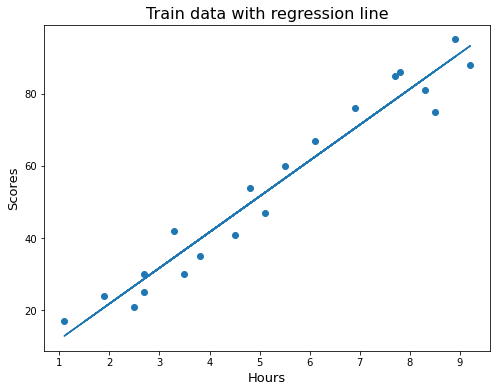

In [89]:
#Plotting the regression line with train data.

line = regressor.coef_*x + regressor.intercept_

plt.figure(figsize=(8,6))
plt.scatter(train_x,train_y)
plt.plot(x,line)


plt.xlabel('Hours',fontsize=13)
plt.ylabel('Scores',fontsize=13)
plt.title('Train data with regression line',fontsize=16)

plt.show()

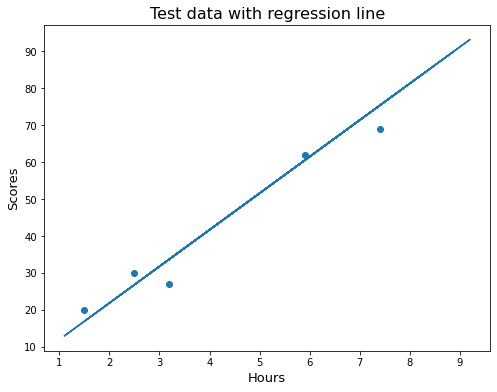

In [90]:
#Plotting the regression line with the test data.

plt.figure(figsize=(8,6))
plt.scatter(test_x,test_y)
plt.plot(x,line)

plt.xlabel('Hours',fontsize=13)
plt.ylabel('Scores',fontsize=13)
plt.title('Test data with regression line',fontsize=16)

plt.show()

In [28]:
#predicting scores by test data of Hours.

print(test_x)

y_predict = regressor.predict(test_x)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [31]:
#Predicted Scores.

y_predict[:,0]

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [39]:
#Comparing Actual scores with predicted scores.

compare_y = pd.DataFrame(data=[test_y[:,0],y_predict[:,0]]).T

compare_y.rename(columns={0:'Actual Score',1:'Predicted Score'})

,Actual Score,Predicted Score
0,20.0,16.884145
1,27.0,33.732261
2,69.0,75.357018
3,30.0,26.794801
4,62.0,60.491033


In [62]:
#Model evaluation.

metrics.mean_absolute_error(test_y,y_predict)

4.183859899002975

# Making Predictions

In [91]:
prediction = regressor.predict([[9.25]])

In [92]:
print('The predicted Score for 9.25 hours is',prediction[0,0])

The predicted Score for 9.25 hours is 93.69173248737538


# Conclusion

The given data consists of the relationship between number of study hours put in and the marks scored respectively. 


Linear Regression method is used to build a model to predict the scored for the given number of hours. This can help administration to predict the scores given by the number of studying hours the students put in and make appropriate decisions.